# Programming Exercise 3Programming Exercise 3
## Multi-class Classiﬁcation Multi-class Classiﬁcation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat

In [2]:
data = loadmat('./ex3data1.mat')
# image = data['X'][1].reshape(20,20)
# plt.matshow(image,cmap='gray_r')
data['X'].shape,data['y'].shape


((5000, 400), (5000, 1))

In [3]:
def plot_100_image(X):
    sample_index = np.random.choice(X.shape[0],100) #从 N（个样本）中，随机选出100个数字
    sample_images = X[sample_index,:]#选择其中随机的100行 (100,400)
    
    fig, ax_arraya = plt.subplots(nrows=10,ncols=10,sharex=True,sharey=True,figsize=(8,8))
    for row in range(10):
        for col in range(10):
            ax_arraya[row,col].matshow(sample_images[10*row + col].reshape(20,20), cmap = 'gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()


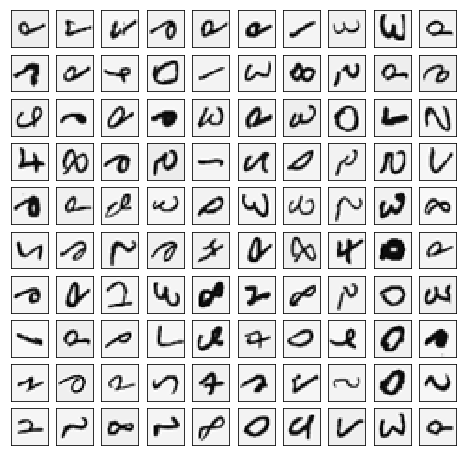

In [4]:
plot_100_image(data['X'])

In [5]:
def segmoid(z):
    # z = theta 与 X 向量的乘积
    return 1/(1+np.exp(-z))

In [6]:
def cost_reg(theta, X, y, l=1): # l为正则化参数
    # theta (401,)
    # X (5000,401)  第一列全为1
    # y (5000,1)
    reg = theta[1:]
    h = segmoid(X @ theta)
    assert h.shape==(5000,), 'error : h.shape {}'.format(h.shape)
    m = len(X)
    reg = (l/(2*m)) * (reg @ reg)

    first = y * np.log(h)
    second = (1-y) * np.log(1-h)
    
    return np.mean(-first-second) + reg


In [7]:
def gredient_reg(theta, X, y, l=1): #不需要学习率，自动调参
     # theta (n,1)
    # X (m,n)
    # y (m,1)
    m = X.shape[0]
    reg = (l/m) * theta
    reg[0] = 0
    h = segmoid(X @ theta)

    return (1/m) * X.T @ (h-y) + reg

In [8]:
def one_vs_all(X,y,l,k): # 其中k为分类的标签数
    # X 的第一列为 1 (偏置量)
    all_theta = np.zeros((10,X.shape[1]))  #(10,401)

    #对每个标签都进行一次筛选，符合当前循环标签的y_i为1，不符合的其他9个标签，y_i为0.abs
    #将上述操作重复10次，即可得到每个标签对应的theta矩阵(10,401)

    for i in range(1,k+1):
        theta = np.zeros(X.shape[1])
        y_i = np.array([1 if current_y==i else 0 for current_y in y])

        result = minimize(fun=cost_reg, x0=theta, args=(X,y_i,l), method='TNC', jac=gredient_reg, options={'disp':True})
        
        all_theta[i-1,:] = result.x # x：优化问题的目标数组
    
    return all_theta # (10,401)

In [9]:
def predicte_all(theta, X, y):
    #X (5000,401)
    #y (5000,1)
    #theta (10,401)
    h = segmoid(X @ theta.T)  #(5000,10)
    predict_y = np.argmax(h,axis=1) + 1# 沿着1维轴，找到最大的值，并放回其索引
    predict_y = predict_y.reshape(5000,1)
    assert predict_y.shape == y.shape,'error: predict_y.shape {} != y.shape {}'.format(predict_y.shape,y.shape)
    num = predict_y==y
    return np.mean(num)
        

In [10]:
X = np.append(np.ones((data['X'].shape[0],1)), data['X'], axis=1)
finall_theta = one_vs_all(X,data['y'],1,10)
finall_theta

array([[-2.38188908e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30443134e-03, -7.55425169e-10,  0.00000000e+00],
       [-3.18445549e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45835773e-03, -5.08291074e-04,  0.00000000e+00],
       [-4.79316194e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86536335e-05, -2.47190356e-07,  0.00000000e+00],
       ...,
       [-7.98537313e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96500267e-05,  7.22279259e-06,  0.00000000e+00],
       [-4.57051321e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33737557e-03,  9.99743778e-05,  0.00000000e+00],
       [-5.40406888e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16585669e-04,  7.86711703e-06,  0.00000000e+00]])

In [11]:
accurate ='accurate = {}%'.format(predicte_all(finall_theta,X,data['y'])*100)
accurate

'accurate = 94.46%'